Titanic Practice Project:
    
    The task is to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [516]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [517]:
#Acquiring Data

titanic=pd.read_csv('Titanic.csv')

In [518]:
df=pd.DataFrame(data=titanic)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [519]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [520]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [522]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [523]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [524]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [525]:
df["Sex"].isnull().sum()

0

There is no null or NaN values in Sex Coulmn


In [526]:
df["Cabin"].isnull().sum()

687

We can observe that Cabin Columns has Many Nan Values, we can exclude this Column from the analysis.

In [527]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [528]:
df["Parch"].isnull().sum() #There is no NaN values in Parch Column

0

In [529]:
df["Pclass"].unique()  # There is no Nan values in Pclass Column

array([3, 1, 2], dtype=int64)

In [530]:
df["SibSp"].unique() # THere is no Nan Values in SibSp Column

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [531]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [532]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [533]:
df["Embarked"].isnull().sum() # There are 2 NaN values in the Embarked Column

2

In [534]:
df.shape

(891, 12)

In [535]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [536]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [537]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Frauenthal, Mrs. Henry William (Clara Heinshei...",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [538]:
#Lets check the correlation with target variable:

cor_mat=df.corr()
cor_mat["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<AxesSubplot:>

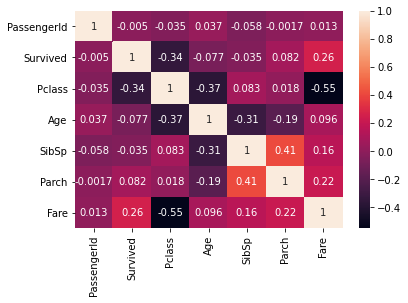

In [539]:
sns.heatmap(cor_mat, annot=True)

In [540]:
missing=df.isnull().sum().sort_values(ascending=True)
missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [541]:
miss_percent=(round((df.isnull().sum()/df.isnull().count()*100),1).sort_values(ascending=False))
miss_percent

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
dtype: float64

In [542]:
missing_data=pd.concat([missing,miss_percent], axis=1, keys=['missing','%'])
missing_data

,missing,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Embarked,2,0.2


We can see that Cabin column has 77% missing values that need to be filled.

Embarked has 2 missing values which can be filled easily.

Age has 177 missing values that also need to be filled.

In [543]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [544]:
df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [545]:
df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [546]:
df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


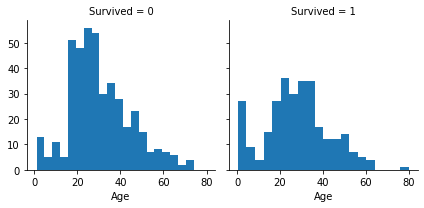

In [547]:
g=sns.FacetGrid(df, col='Survived')
g.map(plt.hist,'Age',bins=20)

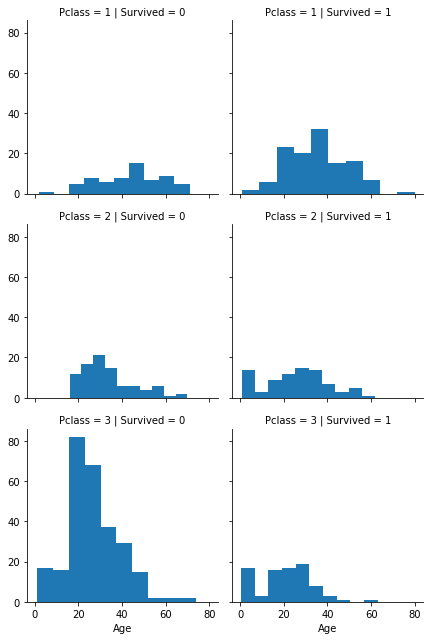

In [548]:
g=sns.FacetGrid(df,col='Survived', row='Pclass')
g.map(plt.hist, 'Age')
g.add_legend()

In [549]:
#Filling Missing Values for Age::
print("Median for age seperated by Pclass :")
display(df.groupby('Pclass')['Age'].median())

print("Median for Age seperated by Pclass and Sex :")
display(df.groupby(['Pclass','Sex'])["Age"].median())

print("No.of Cases :")
display(df.groupby(["Pclass","Sex"])["Age"].count())


Median for age seperated by Pclass :


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median for Age seperated by Pclass and Sex :


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

No.of Cases :


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

In [550]:
#Lets replace the missing values with median

df["Age"]=df.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))

In [551]:
df["Age"].count()

891

In [552]:
#Embarked
df["Embarked"].isnull().sum()

2

In [553]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [554]:
#Lets fill the Nan Values of Embarked with 'S' most frequent value

df["Embarked"]=df["Embarked"].fillna('S')
df["Embarked"].isnull().sum()

0

In [555]:
#Feature Engineering : 
df["Name"].head(10)   
    # We can see many titles associated with the NAme like Mr, Mrs..

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [556]:
# Get Title from Name
df_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]

# add dataset_title to the main dataset named 'Title'
df["Title"] = pd.Series(df_title)

# count
df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Ms                1
Lady              1
Jonkheer          1
Capt              1
Mme               1
Don               1
the Countess      1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Age'>

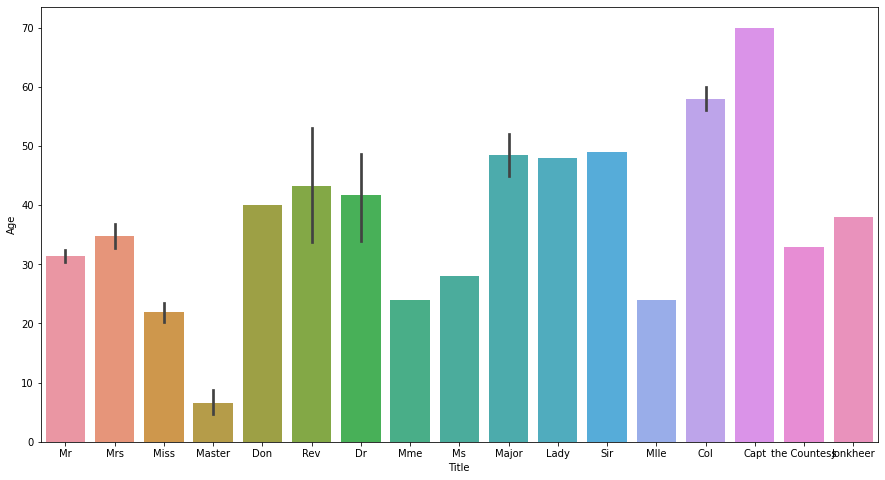

In [557]:
# Plot bar plot (titles and Age)
plt.figure(figsize=(15,8))
sns.barplot(x=df['Title'], y = df['Age'])

In [558]:
#Lets convert the Titles 

for i in df:
    df['Title'] = df['Title'].replace(['Don', 'Rev','Dr','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [559]:
df["Title"].isnull().sum()

0

In [560]:
df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [561]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [562]:
#Lets Make Column Title as Categorical VAlue
df["Title"]=df["Title"].map({"Mrs":1, "Miss":2, "Master":3, "Mr":4, "Rare":5}).astype(int)

In [563]:
df["Title"].head()

0    4
1    1
2    2
3    1
4    4
Name: Title, dtype: int32

In [564]:
df["Title"].value_counts()

4    517
2    185
1    126
3     40
5     23
Name: Title, dtype: int64

In [565]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [566]:
#Lets combine SibSp and Parch to make Fam_size

df["Fam_size"]=df["SibSp"]+df["Parch"]+1
df["Fam_size"].head()

0    2
1    2
2    1
3    2
4    1
Name: Fam_size, dtype: int64

In [567]:
#Lets Drop Name, SibSp, Parch and PassangerId Columns as we have already featured new columns from these column data Title and Fam_size
df.drop(["Name","SibSp","Parch"], axis=1, inplace=True)

In [568]:
#Lets drop PassengerId as well
df.drop(["PassengerId"], axis=1, inplace=True)

In [569]:
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Fam_size
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,4,2
1,1,1,female,38.0,PC 17599,71.2833,C85,C,1,2
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,1,1,female,35.0,113803,53.1000,C123,S,1,2
4,0,3,male,35.0,373450,8.0500,NaN,S,4,1


In [570]:
#Lets drop Ticket and Cabin as they are alphanumerical values
df.drop(["Ticket","Cabin"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Fam_size
0,0,3,male,22.0,7.2500,S,4,2
1,1,1,female,38.0,71.2833,C,1,2
2,1,3,female,26.0,7.9250,S,2,1
3,1,1,female,35.0,53.1000,S,1,2
4,0,3,male,35.0,8.0500,S,4,1


In [571]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])
df["Embarked"]=LE.fit_transform(df["Embarked"])

In [572]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Fam_size
0,0,3,1,22.0,7.2500,2,4,2
1,1,1,0,38.0,71.2833,0,1,2
2,1,3,0,26.0,7.9250,2,2,1
3,1,1,0,35.0,53.1000,2,1,2
4,0,3,1,35.0,8.0500,2,4,1


In [573]:
#Lets Split the data into feature and target variable
df_x=df.drop(columns=["Survived"])
y=df["Survived"]
df_x.shape, y.shape

((891, 7), (891,))

In [574]:
#Lets scale the data as the data is not is one standard scaling format

from sklearn.preprocessing import StandardScaler

SS=StandardScaler()
x=SS.fit_transform(df_x)

x=pd.DataFrame(x,columns=df_x.columns)
x


,Pclass,Sex,Age,Fare,Embarked,Title,Fam_size
0,0.827377,0.737695,-0.534891,-0.502445,0.585954,0.716286,0.059160
1,-1.566107,-1.355574,0.668392,0.786845,-1.942303,-1.786503,0.059160
2,0.827377,-1.355574,-0.234070,-0.488854,0.585954,-0.952240,-0.560975
3,-1.566107,-1.355574,0.442776,0.420730,0.585954,-1.786503,0.059160
4,0.827377,0.737695,0.442776,-0.486337,0.585954,0.716286,-0.560975
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.158865,-0.386671,0.585954,1.550550,-0.560975
887,-1.566107,-1.355574,-0.760507,-0.044381,0.585954,-0.952240,-0.560975
888,0.827377,-1.355574,-0.572494,-0.176263,0.585954,-0.952240,1.299429
889,-1.566107,0.737695,-0.234070,-0.044381,-1.942303,0.716286,-0.560975


In [575]:
x.shape, y.shape

((891, 7), (891,))

###### Train_Test Split

In [576]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(694, 7)
(197, 7)
(694,)
(197,)


###### Finding Best Random State

In [578]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

maxAc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAc:
        maxAc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAc, "on Random State ",maxRS)

Best Accuracy is  0.88268156424581 on Random State  11


###### Lets Build the Model


In [579]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

lr=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()

model = [lr,svc,dtc,knn,gnb,rfc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is :',acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of LogisticRegression() is : 0.7877094972067039
[[89 16]
 [22 52]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Accuracy Score of SVC() is : 0.8156424581005587
[[96  9]
 [24 50]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



Accuracy Score of DecisionTreeClassifier() is : 0.7597765363128491
[[85 20]
 [23 51]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       10

###### Cross Validation :

In [591]:
lr_score=cross_val_score(lr, x,y,cv=3)
svc_score=cross_val_score(svc, x,y,cv=3)
dtc_score=cross_val_score(dtc, x,y,cv=3)
knn_score=cross_val_score(knn, x,y,cv=3)
gnb_score=cross_val_score(gnb, x,y,cv=3)
rfc_score=cross_val_score(rfc, x,y,cv=3)

cross_val_model=[lr_score,svc_score,dtc_score,knn_score,gnb_score,rfc_score]

for i in cross_val_model:
    print("Accuracy Score of is : ",i.mean())
    print(i)
    print("Mean Score : ",i.mean())
    print("Standard Deviation : ", i.std())
    print('\n')

Accuracy Score of is :  0.8136924803591471
[0.8047138  0.81481481 0.82154882]
Mean Score :  0.8136924803591471
Standard Deviation :  0.006918534234533093


Accuracy Score of is :  0.8350168350168351
[0.81818182 0.84175084 0.84511785]
Mean Score :  0.8350168350168351
Standard Deviation :  0.011983252808115947


Accuracy Score of is :  0.7744107744107743
[0.76767677 0.8047138  0.75084175]
Mean Score :  0.7744107744107743
Standard Deviation :  0.022502735865054344


Accuracy Score of is :  0.8013468013468014
[0.78451178 0.81481481 0.8047138 ]
Mean Score :  0.8013468013468014
Standard Deviation :  0.012598173019440873


Accuracy Score of is :  0.7923681257014591
[0.77777778 0.80808081 0.79124579]
Mean Score :  0.7923681257014591
Standard Deviation :  0.012396589244879071


Accuracy Score of is :  0.8069584736251403
[0.8013468  0.81818182 0.8013468 ]
Mean Score :  0.8069584736251403
Standard Deviation :  0.007936103043620078




In [ ]:
SVC algorithm has got more accuracy 83.50% as compared to other algorithms.

###### Hyper Parameter Tuning :

In [582]:
from sklearn.model_selection import GridSearchCV

In [598]:
param_grid = {'kernel':['linear', 'poly', 'rbf'],
             'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001]}

In [599]:
GCV=GridSearchCV(SVC(),param_grid,refit=True, cv=3, verbose=2)
GCV.fit(x_train,y_train)
GCV.best_params

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.3s
[CV] END ........................C=100, gamma=1, kernel=poly; total time= 1.1min
[CV] END ........................C=100, gamma=1, kernel=poly; total time=  31.4s
[CV] END ...................

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [600]:
print("Best Parameters : ",GCV.best_params_)
print("Best Estimator : ",GCV.best_estimator_)

Best Parameters :  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator :  SVC(C=1, gamma=0.1)


In [601]:
GCV_pred=GCV.predict(x_test)
print(classification_report(y_test,GCV_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



###### Saving The Model :

In [602]:
import joblib

In [603]:
joblib.dump(GCV.best_estimator_, "Titanic.pkl")

['Titanic.pkl']